<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [126]:
!pip3 install ydata_profiling
!pip3 install PyQt6

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns
from ydata_profiling import ProfileReport

random.seed(42)
np.random.seed(42)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here` Сиды фиксируем для воспроизводимости результатов

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [128]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [129]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


None

**Ваш ответ здесь.**

Пропуски есть в столбцах 'mileage', 'engine', 'max_power', 'torque', 'seats'

In [130]:
print('Дубликаты в трейне:', df_train.duplicated().sum())
print('Дубликаты в тесте:', df_test.duplicated().sum())


Дубликаты в трейне: 985
Дубликаты в тесте: 62


In [131]:
profile = ProfileReport(pd.concat([df_train, df_test]))
profile.to_file(output_file="report.html")

Summarize dataset:  75%|██████████████████▊      | 15/20 [00:00<00:00, 69.97it/s, Calculate auto correlation]/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/ydata_profiling/model/correlations.py:87: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(
Export report to file: 100%|██████████████████████████████████████████████████| 1/1 [00:00<00:00, 429.92it/s]


Выводы по дашборду:
* В датасете есть дубликаты, некоторые строки встречаются аж около 30 раз
* В половине столбцов есть пропущенные значения, но их не так много, а значит скорее всего проще будет удалить в будущем
* Столбцы name, torque не выглядят как полезные, много различных текстовых значений, которые вряд ли о чем-то скажут -> скорее всего удалим их в будущем
* Столбцы max_power, engine, mileage нужно будет предобработать и перевести в числовой вид
* В столбце owner есть явный перекос в сторону First/Second owner, наверняка лучше три остальных возможных случая объединить при кодировании
* Значений CNG и LPG слишком мало в столбце fuel по сравнению с двумя основными, сложно будет обучить модель с их помощью
* В столбцaх seller_price и year есть явно выделяющиеся выбросы, которые, на мой взгляд, не соответствуют реальности. Нужно будет почистить датасет от них, тогда распределение станет более близким к нормальному
* Признаков того, что по данному датасету нельзя обучить модель пока что не появилось

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [132]:
# Ваш код здесь
display(df_train.describe())
display(df_test.describe())
display(df_train.describe(include=['object']))
display(df_test.describe(include=['object']))


,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


Выводы:
* По числовым признакам train/test заметных расхождений нет, явно отличаются только максимумы, в train попало 1 или несколько выбросов
* Категориальные статистики тоже особым образом не отличаются
* Признаков того, что по данному датасету нельзя обучить модель все еще нет

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [133]:
X_train = df_train.copy()
X_train = X_train.drop(columns='selling_price')

duplicates = X_train[X_train.duplicated(keep=False)]
display(duplicates)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [134]:
df_train = df_train.drop_duplicates(subset=X_train.columns, keep='first')

In [135]:
df_train = df_train.reset_index(drop=True)

In [136]:
assert df_train.shape == (5840, 13)

> Могут ли в данных быть другие скрытые дубли?
* Да, могут, например из-за отличающихся форматов строковых признаков. К примеру, одно и то же значение torque можно записать по разному в виде строки. Отлавливать такое нужно сначала предобработав строковые признаки, преобразовав их в числа.
* Наверняка значения с плавающей точкой могут записывать случайно с разной точностью или в одном случае с добавлением сотых, а в другом нет. Малоразличимые данные по факту не дадут нам предельную точность, но дубликатами они являться по факту могут. Предложение по избавлению от таких дубликатов: округлять значения с плавающей точкой хотя бы до целых чисел.

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [137]:
# your code here

# преобразуем mileage, engine, max_power, т.к. алгоритм для них будет одинаковый
def handle_measured(s):
    if pd.isnull(s) or pd.isna(s):
        return None
    digits_and_dots = [c for c in s if c.isdigit() or c == '.']
    return float(''.join(digits_and_dots)) if len(digits_and_dots) > 0 else None

df_train['mileage'] = df_train['mileage'].apply(handle_measured)
df_test['mileage'] = df_test['mileage'].apply(handle_measured)

df_train['engine'] = df_train['engine'].apply(handle_measured)
df_test['engine'] = df_test['engine'].apply(handle_measured)

df_train['max_power'] = df_train['max_power'].apply(handle_measured)
df_test['max_power'] = df_test['max_power'].apply(handle_measured)

display(df_train.head())
display(df_test.head())


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,96 Nm at 3000 rpm,5.0


In [138]:
def get_torque(s):
    if pd.isnull(s) or pd.isna(s):
        return None
    first_float_str = ''
    for i in range(len(s)):
        if s[i].isdigit() or s[i] == '.':
            first_float_str = s[i] + first_float_str
        elif len(first_float_str) > 0:
            break
    if 'kgm' in s.lower():
        return float(first_float_str) * 9.80665
    return float(first_float_str) if len(first_float_str) > 0 else None
    

def get_max_torque_rpm(s):
    if pd.isnull(s) or pd.isna(s):
        return None
    last_float_str = ''
    for i in range(len(s)):
        if s[-i-1].isdigit() or s[-i-1] == '.':
            last_float_str = s[-i-1] + last_float_str
        elif len(last_float_str) > 0:
            break
    return float(last_float_str) if len(last_float_str) > 0 else None
    
df_train['max_torque_rpm'] = df_train['torque'].apply(get_max_torque_rpm)
df_test['max_torque_rpm'] = df_test['torque'].apply(get_max_torque_rpm)

df_train['torque'] = df_train['torque'].apply(get_torque)
df_test['torque'] = df_test['torque'].apply(get_torque)

display(df_train.head())
display(df_test.head())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,91.000000,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,52.000000,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,41.384063,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,50.111981,5.0,500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,57.311000,5.0,4000.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,62.0,7.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,62.0,5.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,271.0,5.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,2.0,5.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,69.0,5.0,3000.0


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [139]:
# your code here
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5654 non-null   float64
 9   engine          5654 non-null   float64
 10  max_power       5656 non-null   float64
 11  torque          5653 non-null   float64
 12  seats           5654 non-null   float64
 13  max_torque_rpm  5653 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         981 non-null    float64
 9   engine          981 non-null    float64
 10  max_power       981 non-null    float64
 11  torque          981 non-null    float64
 12  seats           981 non-null    float64
 13  max_torque_rpm  981 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


None

In [140]:
for column in ['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats']:
    df_train[column] = df_train[column].fillna(df_train[column].median())
    df_test[column] = df_test[column].fillna(df_test[column].median())

display(df_train.info())
display(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   float64
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   float64
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   float64
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


None

* Видим, что пропусков после преобразований не осталось

> Почему правильно использовать медиану, могли ли применить среднее?
* Да, среднее применить могли, но как мы видели выше, в данных присутствуют выбросы, которые сдвинут в среднее в сторону неправды, поэтому в данном случае лучше применить медиану

> Как правильно считать медиану для заполнения?
* Отдельно для тестовых и тренировочных данных, потому что мы не должны никаким образом давать тренировочным данным информацию о тестовых, так как модель от этого будет использовать тестовые данные для обучения в том числе и не покажет правдивый результат потом на проде.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [141]:
# your code here
display(df_train.head())

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

display(df_train.head())
display(df_test.head())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,91.000000,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,52.000000,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,41.384063,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,50.111981,5.0,500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,57.311000,5.0,4000.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,91.000000,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,52.000000,5,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,41.384063,5,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,50.111981,5,500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,57.311000,5,4000.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498,112.0,62.0,7,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,62.0,5,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799,130.0,271.0,5,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498,98.6,2.0,5,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172,65.0,69.0,5,3000.0


> Почему seats можно рассматривать как категориальную переменную?
* Потому что на самом деле для людей это означает больше категориальный признак (пятиместная, четырехместная, двухместная машина или микроавтобус)

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [142]:
display(df_train.describe())
display(df_test.describe())

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,153.852404,5.426712,2902.946575
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,323.371889,0.982344,1038.348637
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,1.000000,2.000000,0.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,9.000000,5.000000,2000.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,52.073311,5.000000,2800.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,96.000000,5.000000,3750.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,5305.397650,14.000000,5300.000000


,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.338050,1454.87600,90.865230,143.655281,5.403000,2972.456000
std,4.012149,7.585539e+05,48486.218662,3.951748,521.99574,34.887729,257.309244,0.912921,1019.518024
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,1.000000,4.000000,0.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,9.000000,5.000000,2250.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.00000,83.100000,52.000000,5.000000,3000.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,96.000000,5.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,5305.397650,9.000000,5200.000000


> Есть ли основания предполагать, что заполнение пропусков сдвинуло наши распределения
* Да, потому что мы добавляли значения в середину для каждого признака, а значит для расчета 25го/75го перцентиля теперь использовалось большее количество значений

> Могло ли это вообще возникнуть?
* Да, по выше указанной причине, но это не должно сильно повлиять на обучение моделей, потому что пропусков было не так много

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

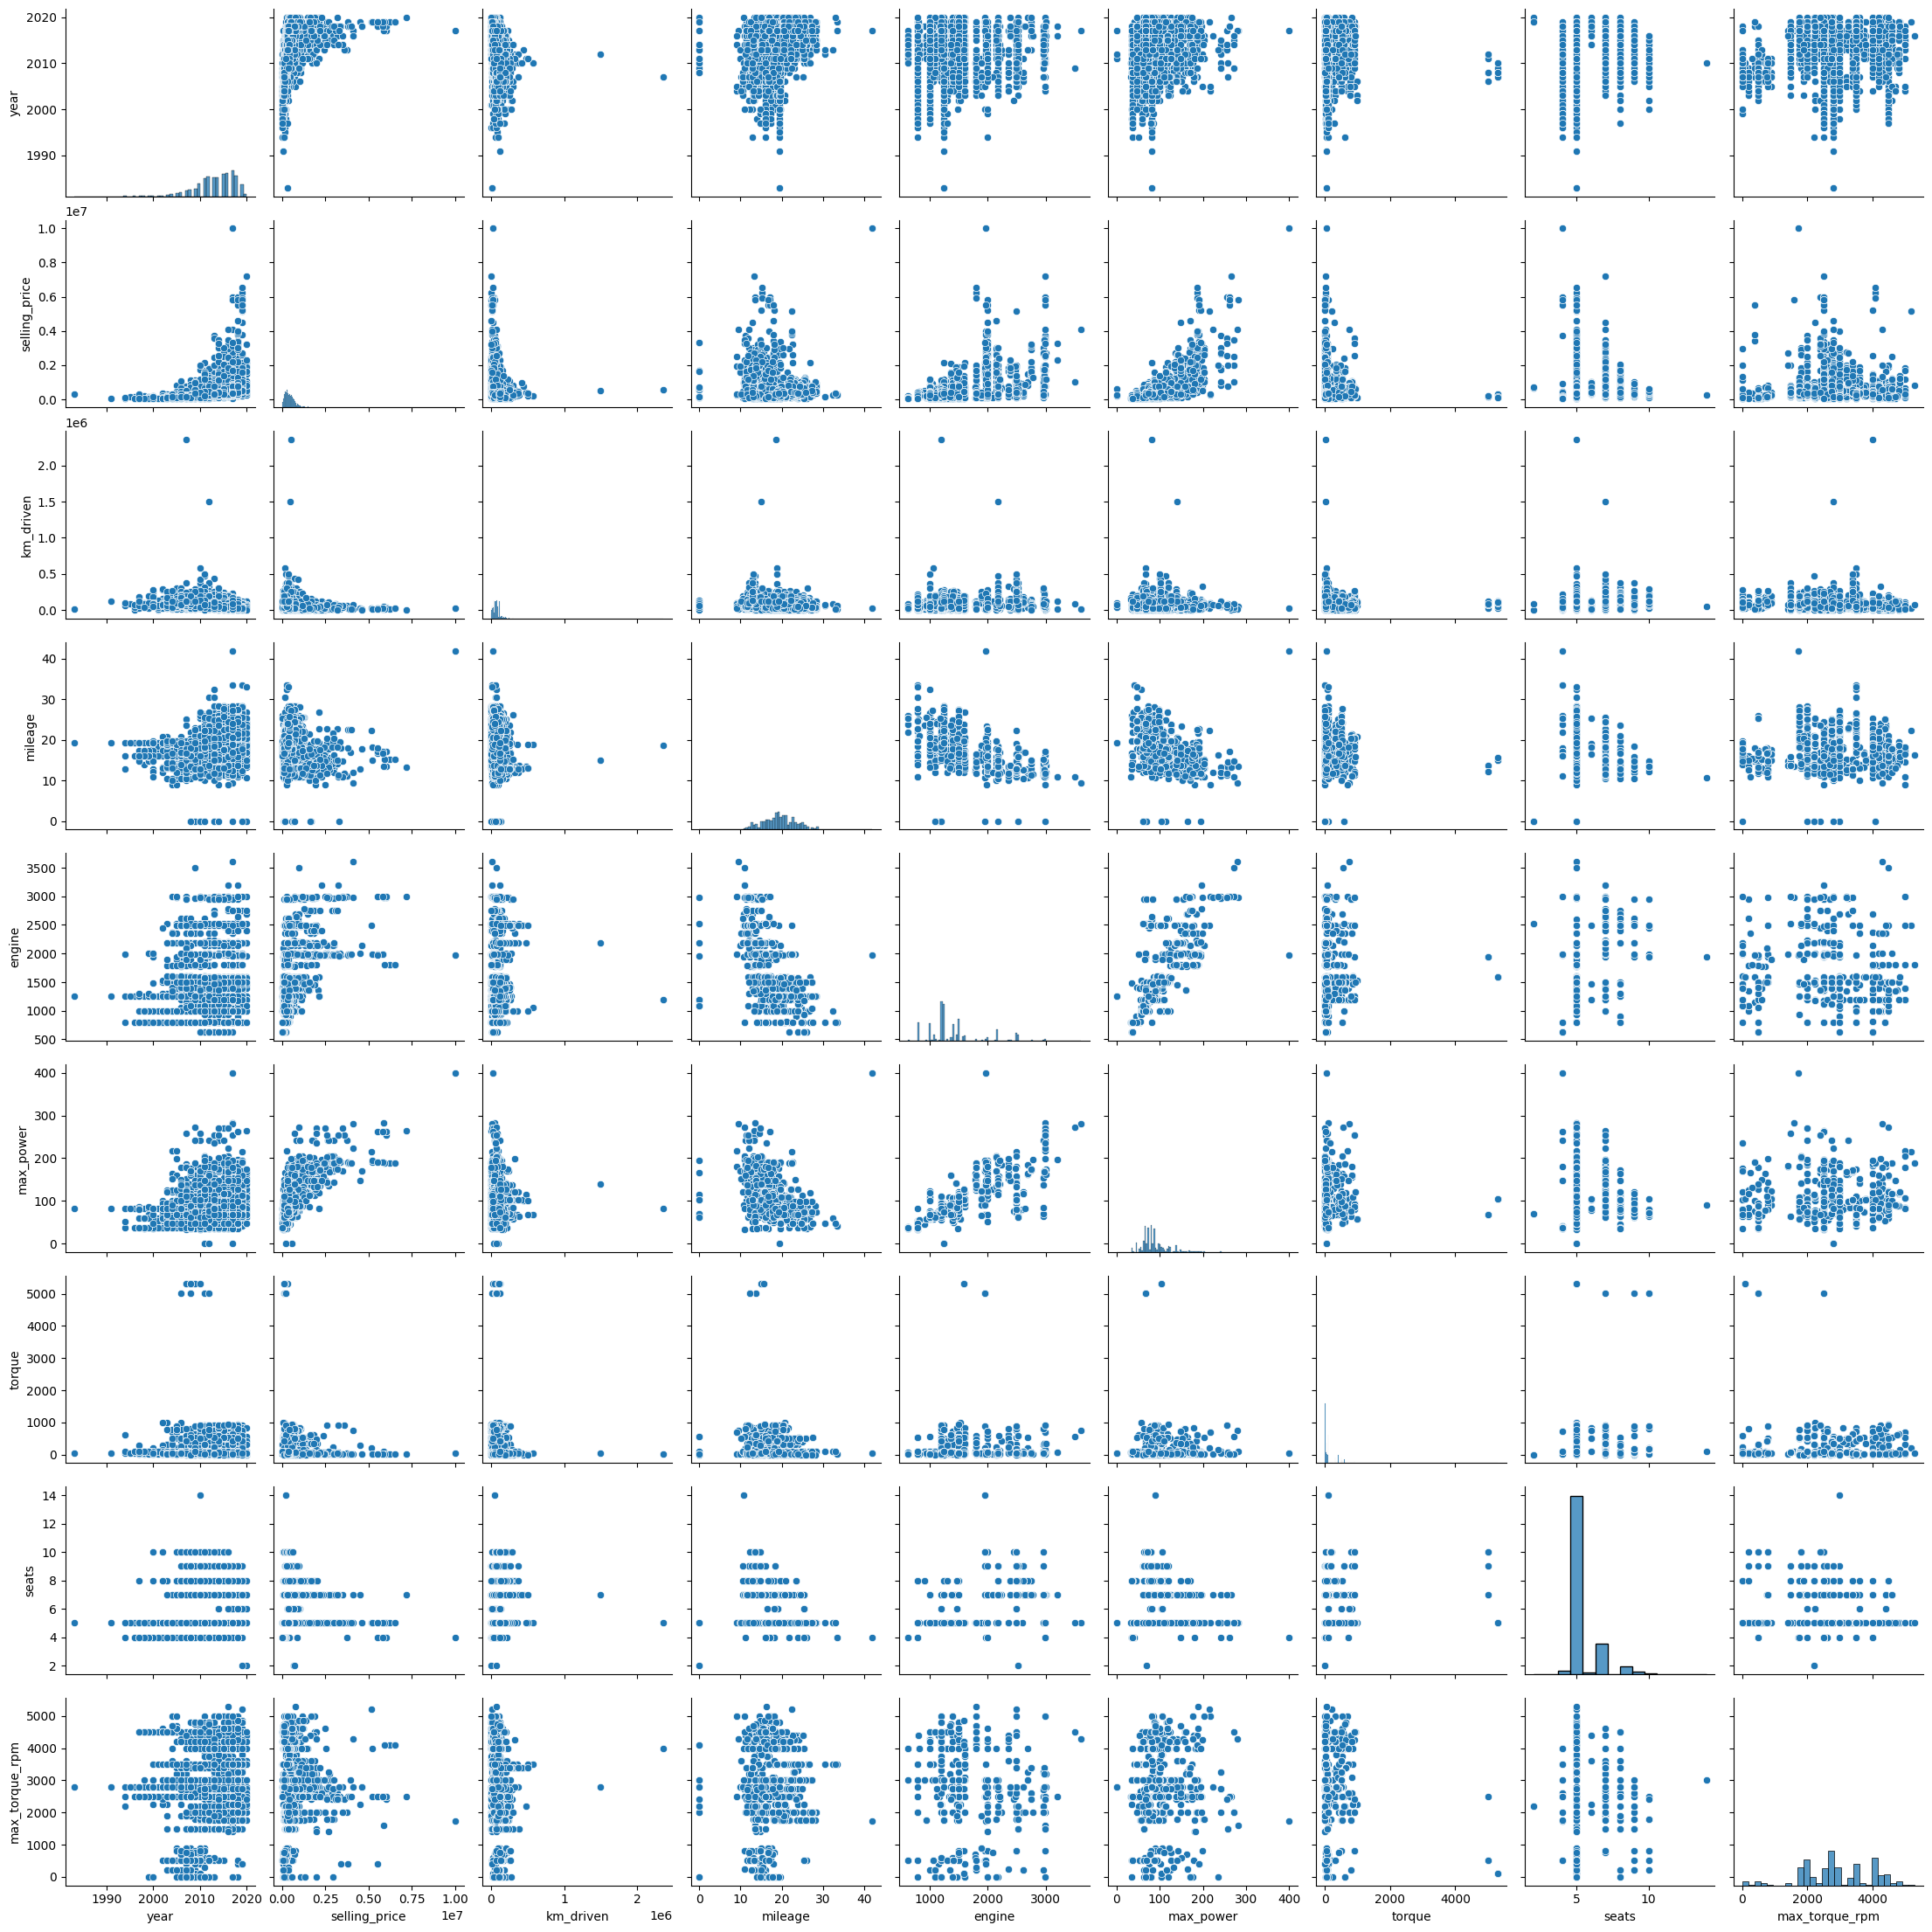

In [143]:
# your code here
# Шаг 1
sns.pairplot(df_train.select_dtypes(include=[np.number]))
plt.show()

> Можно ли предположить связь признаков с целевой переменной?
* Да, на большинстве из полученных диаграмм рассеяния признаков с колонкой seller_price есть тренды распределения данных, и полного хаоса не получилось ни на одном графике

> Можно ли предположить гипотезу о корреляциях признаков?
* Можно предположить линейную корреляцию признаков engine и torque, а также year и torque, судя по их диаграмме рассеяния (подозрения на то, что индустрия развивалась и начинали изготавливать более мощные машины)
* Также отмечу, что выбросы мешают дать детальную аналитику, кажется, нужно было попросить от них избавиться на более ранних этапах

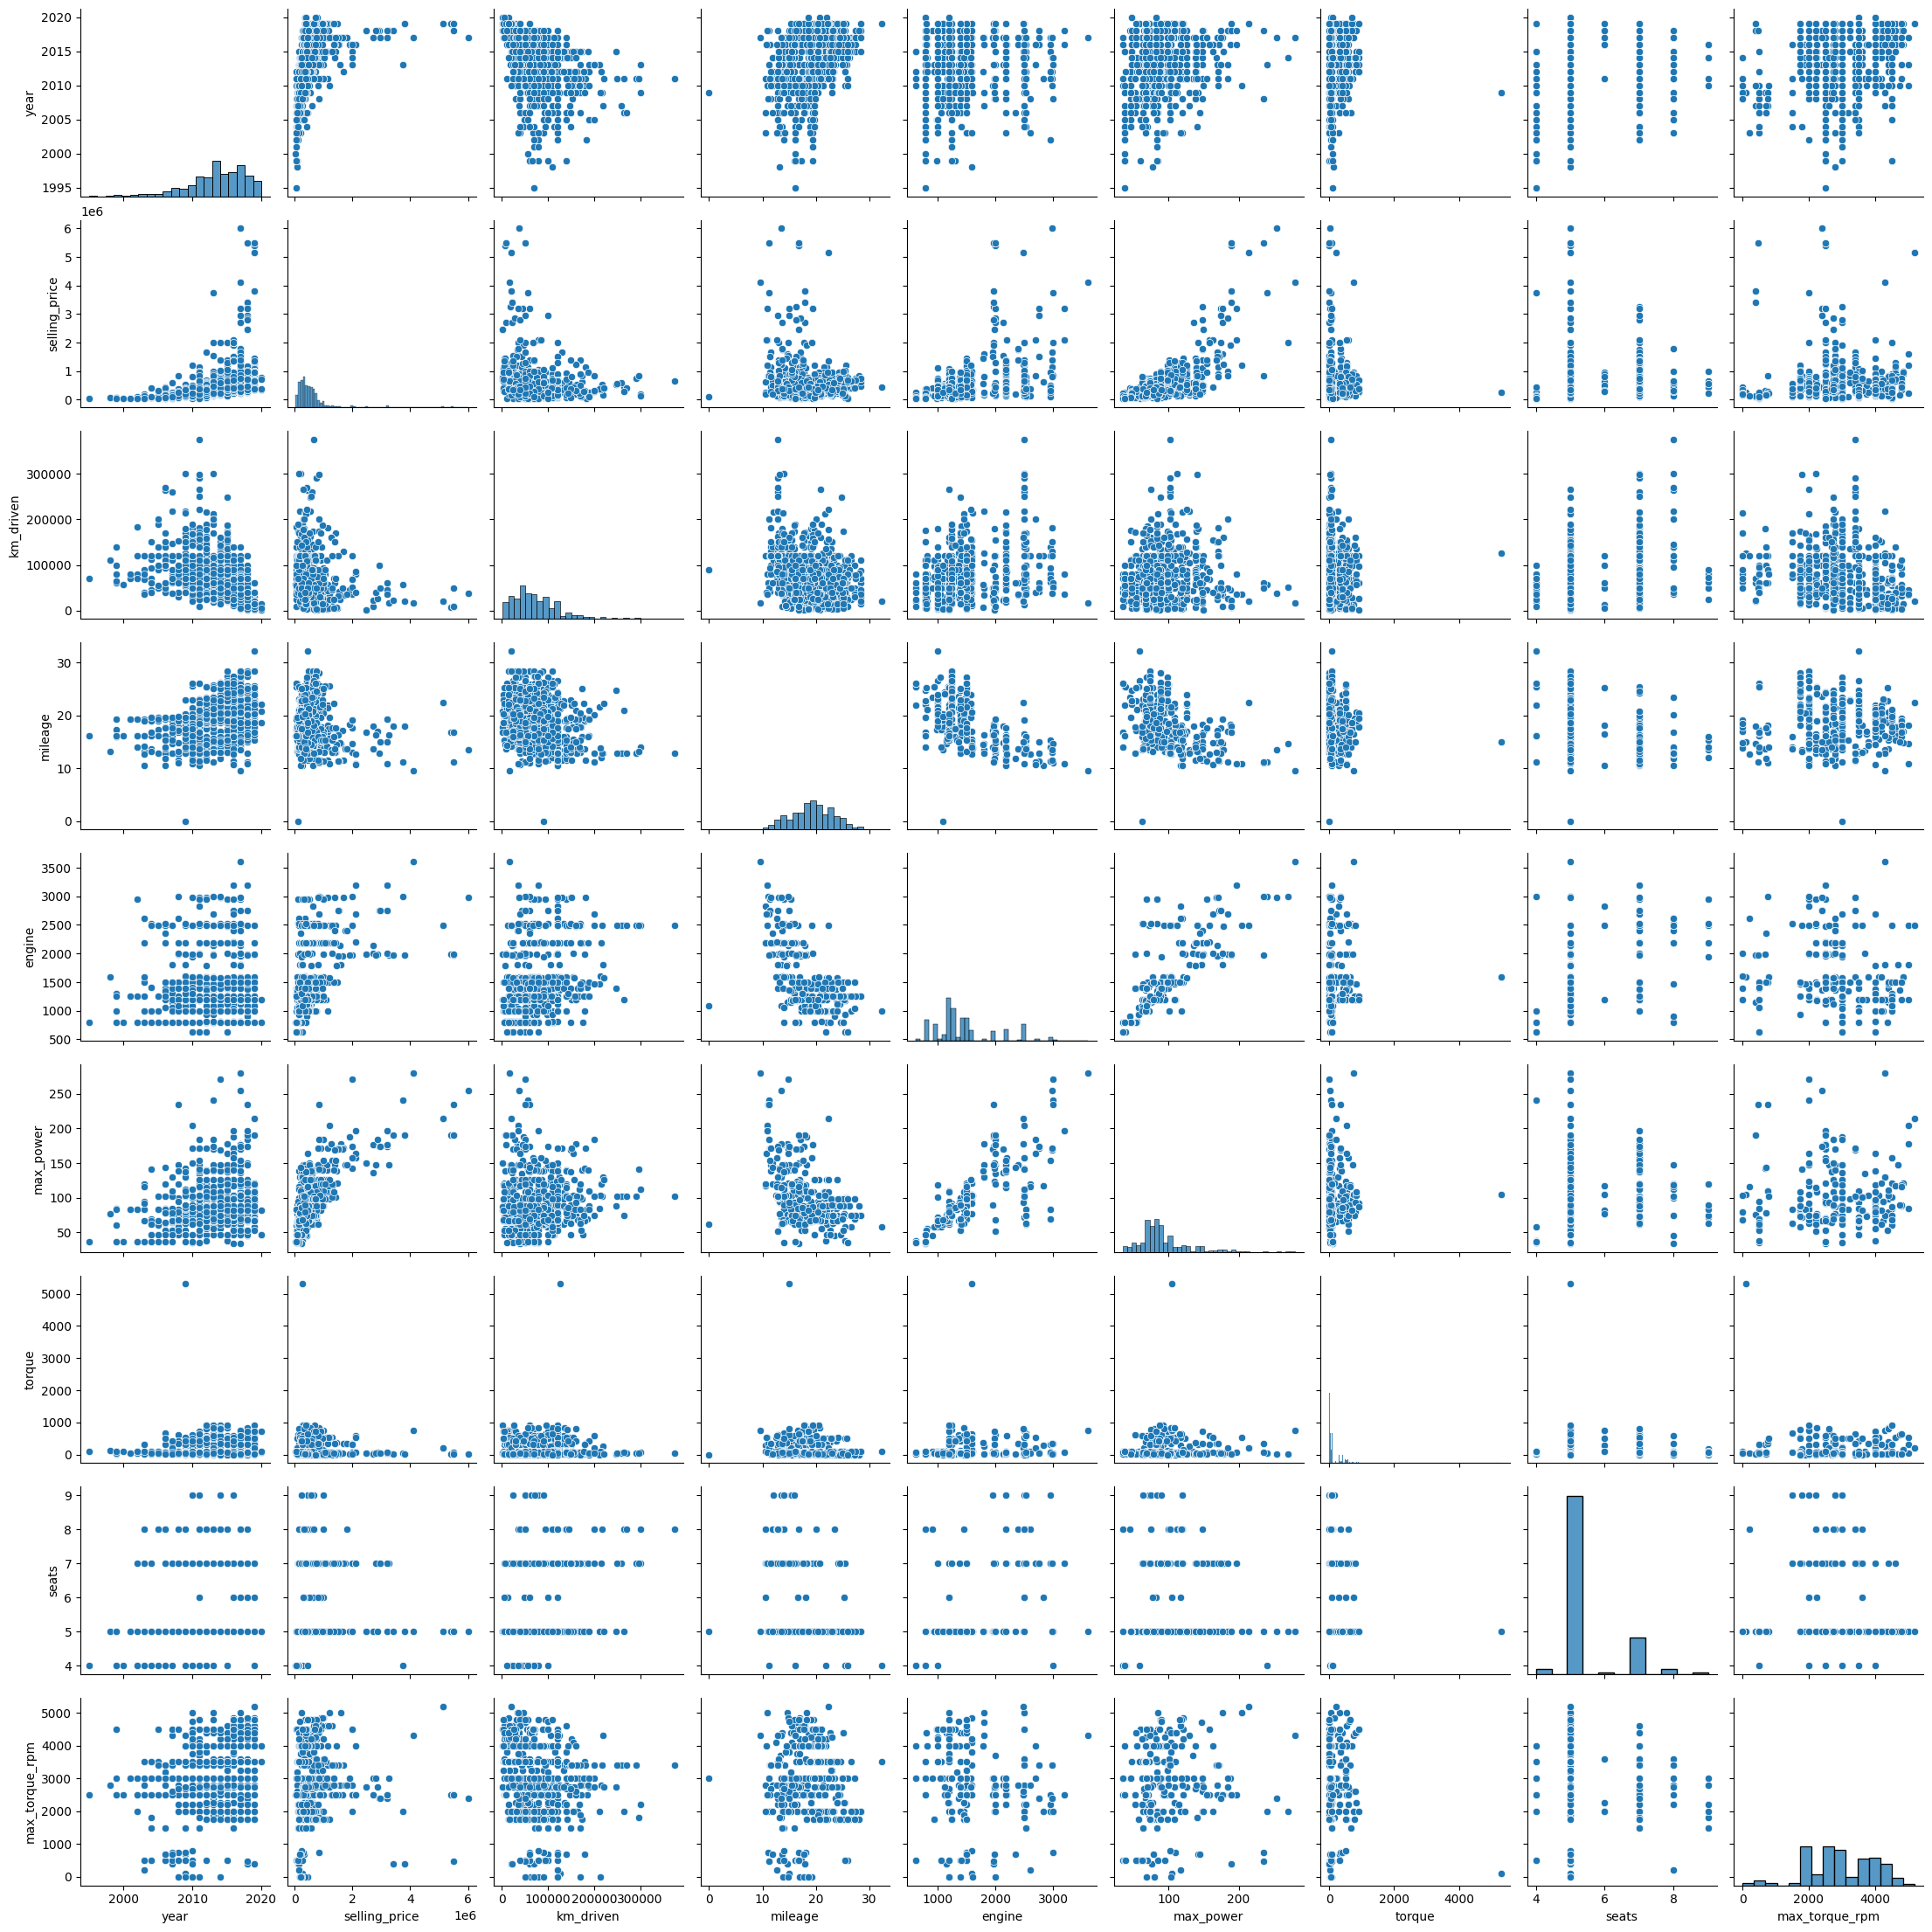

In [144]:
# Шаг 2
sns.pairplot(df_test)
plt.show()

> Похожими ли оказались распределения на тренировочную и тестовую выборку?
* Да, критичных различий я не увидел, особенно внимательно посмотрел на диаграммы рассеяния таргетной переменной с оставшимися. Они похожи в train/test

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

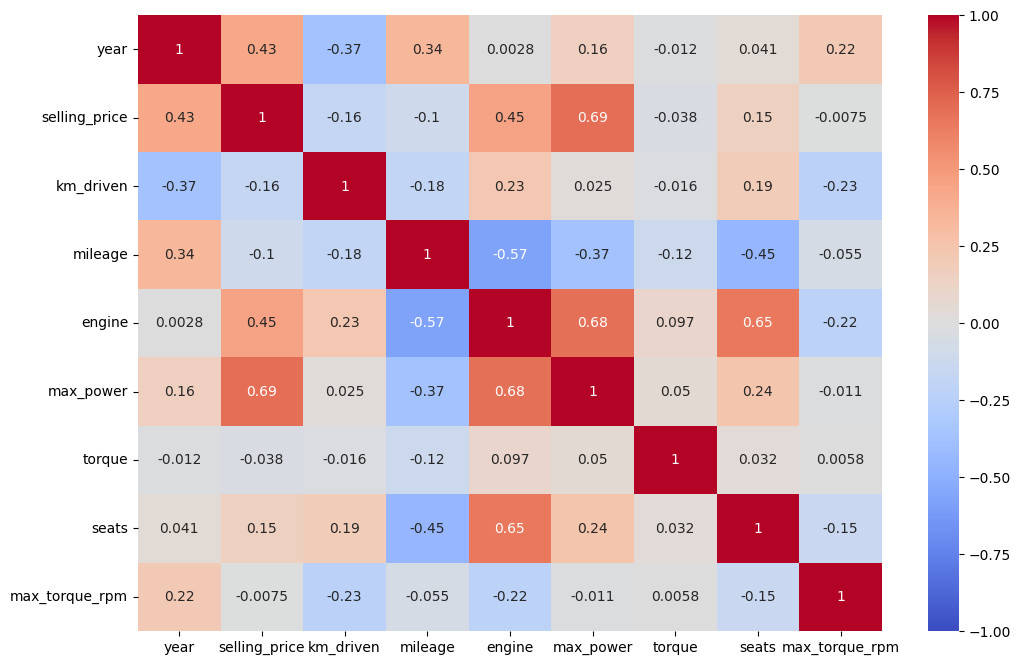

In [145]:
# your code here
corr_matrix = df_train.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

> Какие 2 признака наименее скоррелированы между собой?
* year и engine (0.0028)

> Между какими наблюдается довольно сильная положительная линейная зависимость?
* Между 'selling_price' и 'max_power', 'engine' и 'max_power', 'engine' и 'seats'

> Правда ли, опираясь на данные, что чем меньше год, тем больше км проехала машина?
* Да, между ними наблюдается обратная зависимость с коеффициентом 0.37, это значит, что чем больше год, тем меньше км проехала машина, или наоборот (что и спрашивается в задаче)

> Какой тип корреляции используется по умолчанию в pd.corr()
* По умолчанию (и в нашем случае) использовалась корреляция Пирсона, также есть возможность найти корреляцию Кендалла, Спирмена

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [146]:
# your code here
# Будем работать с корреляцией Спирмена

# Библиотечная реализация
corr_matrix = df_train.select_dtypes(include=[np.number]).corr(method='spearman')
display(corr_matrix)


,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.707123,-0.569659,0.346132,-0.038056,0.165798,-0.013347,0.048291,0.186048
selling_price,0.707123,1.000000,-0.295665,0.026186,0.463577,0.612258,-0.049826,0.317605,-0.020952
km_driven,-0.569659,-0.295665,1.000000,-0.198466,0.304504,0.040919,-0.005992,0.195317,-0.350073
mileage,0.346132,0.026186,-0.198466,1.000000,-0.429871,-0.308824,-0.140243,-0.435458,-0.092694
engine,-0.038056,0.463577,0.304504,-0.429871,1.000000,0.713113,0.100731,0.527716,-0.367548
max_power,0.165798,0.612258,0.040919,-0.308824,0.713113,1.000000,0.002026,0.304857,-0.024659
torque,-0.013347,-0.049826,-0.005992,-0.140243,0.100731,0.002026,1.000000,-0.040147,0.088630
seats,0.048291,0.317605,0.195317,-0.435458,0.527716,0.304857,-0.040147,1.000000,-0.150705
max_torque_rpm,0.186048,-0.020952,-0.350073,-0.092694,-0.367548,-0.024659,0.088630,-0.150705,1.000000


In [147]:
# Собственная реализация
def spearman_correlation(x, y):
    x_sorted = np.sort(x)
    y_sorted = np.sort(y)

    sum_d2 = 0
    for i in range(len(x)):
        rank_x = np.where(x_sorted == x[i])[0][0] + 1
        rank_y = np.where(y_sorted == y[i])[0][0] + 1
        sum_d2 += (rank_x - rank_y) ** 2
    return 1 - 6 * sum_d2 / (len(x) * (len(x) ** 2 - 1))

df_train_number = df_train.select_dtypes(include=[np.number])

spearman_corr_matrix = np.zeros((len(df_train_number.columns), len(df_train_number.columns)))

for i in range(len(df_train_number.columns)):
    for j in range(i, len(df_train_number.columns)):
        spearman_corr_matrix[i, j] = spearman_correlation(df_train_number[df_train_number.columns[i]], df_train_number[df_train_number.columns[j]])
        spearman_corr_matrix[j, i] = spearman_corr_matrix[i, j]

display(pd.DataFrame(spearman_corr_matrix)) # Просто для удобства отображения



,0,1,2,3,4,5,6,7,8
0,1.000000,0.704025,-0.507171,0.357321,-0.034726,0.179468,0.001135,-0.589489,0.212459
1,0.704025,1.000000,-0.279249,0.026896,0.433554,0.607690,-0.072652,-0.430716,-0.020296
2,-0.507171,-0.279249,1.000000,-0.188290,0.288752,0.048994,-0.012974,-0.494087,-0.324688
3,0.357321,0.026896,-0.188290,1.000000,-0.487741,-0.316686,-0.174874,-1.304408,-0.115651
4,-0.034726,0.433554,0.288752,-0.487741,1.000000,0.695154,0.069262,-0.102436,-0.343211
5,0.179468,0.607690,0.048994,-0.316686,0.695154,1.000000,-0.013952,-0.441385,-0.017518
6,0.001135,-0.072652,-0.012974,-0.174874,0.069262,-0.013952,1.000000,-0.773671,0.096276
7,-0.589489,-0.430716,-0.494087,-1.304408,-0.102436,-0.441385,-0.773671,1.000000,-0.843151
8,0.212459,-0.020296,-0.324688,-0.115651,-0.343211,-0.017518,0.096276,-0.843151,1.000000


Результаты собственной реализации похожи на результаты библиотечной, но не совпадают один в один. Подозреваю, что это происходит потому что в библиотечной реализации берется не первое встретившееся значение в качестве ранга, а каким-то образом высчитывается среднее из них. Лучше использовать библиотечную реализацию, чем свою

In [148]:
!pip3 install phik

Defaulting to user installation because normal site-packages is not writeable


interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
name,1.000000,0.948995,0.994871,0.000000,1.000000,0.799127,1.000000,0.830098,0.999690,1.000000,0.997906,0.999920,0.999985,0.999918
year,0.948995,1.000000,0.219841,0.081574,0.205834,0.232412,0.153714,0.418636,0.279253,0.213156,0.381639,0.174820,0.288178,0.361908
selling_price,0.994871,0.219841,1.000000,0.000000,0.157885,0.334505,0.463058,0.557641,0.649768,0.503682,0.872166,0.000000,0.196447,0.167217
km_driven,0.000000,0.081574,0.000000,1.000000,0.046285,0.000000,0.012824,0.087887,0.081625,0.210747,0.000000,0.000000,0.096223,0.121607
fuel,1.000000,0.205834,0.157885,0.046285,1.000000,0.050771,0.053721,0.030943,0.582304,0.644421,0.236006,0.012745,0.450714,0.648464
seller_type,0.799127,0.232412,0.334505,0.000000,0.050771,1.000000,0.127968,0.176612,0.064736,0.160346,0.331904,0.043318,0.032173,0.118346
transmission,1.000000,0.153714,0.463058,0.012824,0.053721,0.127968,1.000000,0.096990,0.331889,0.520161,0.511877,0.021621,0.045734,0.158005
owner,0.830098,0.418636,0.557641,0.087887,0.030943,0.176612,0.096990,1.000000,0.152406,0.186011,0.121438,0.022244,0.046741,0.261189
mileage,0.999690,0.279253,0.649768,0.081625,0.582304,0.064736,0.331889,0.152406,1.000000,0.588155,0.687235,0.240421,0.679979,0.426367
engine,1.000000,0.213156,0.503682,0.210747,0.644421,0.160346,0.520161,0.186011,0.588155,1.000000,0.720780,0.318347,0.603400,0.743764


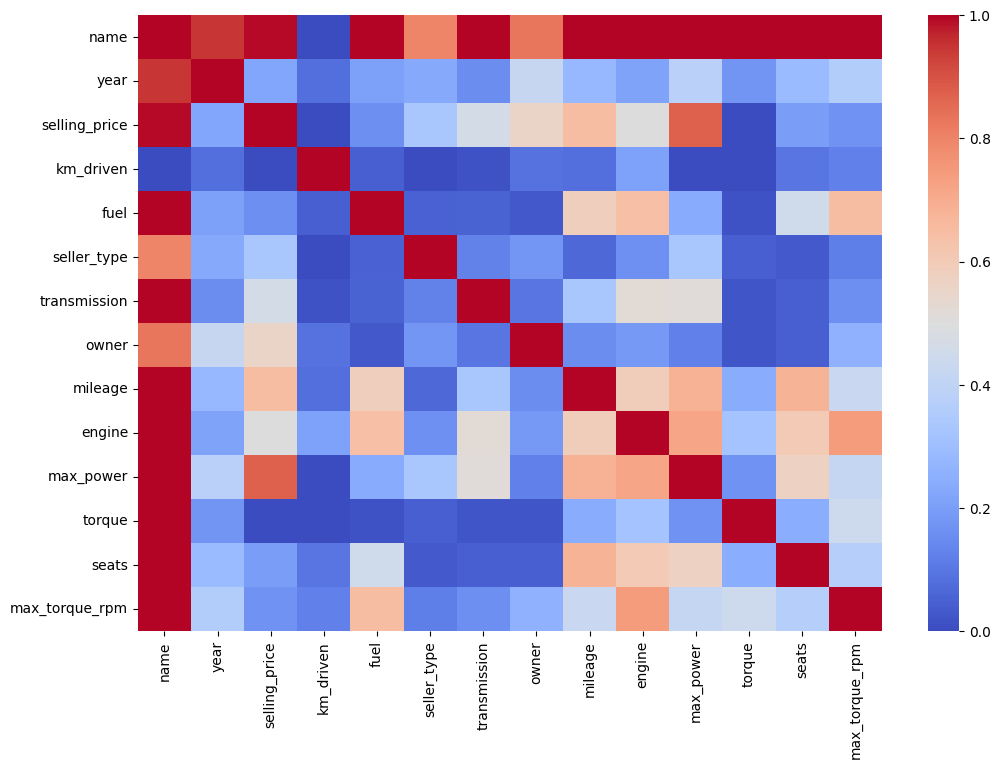

In [149]:
from phik import resources

phik_matrix = df_train.phik_matrix()
display(phik_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=False, cmap='coolwarm', vmin=0, vmax=1)

plt.show()


Интерпретация результатов phik матрицы:
* Странная корреляция признака name со многими другимми признаками. Предполагаю, что это связано с особенностями подсчета корреляций для категориальных признаков, не важно с другими категориальными или с числовыми. name имеет много разных категораильных значений, и phik предполагает, что это значит, что признаки сильно связаны, но связи явно никакой нет. И вообще, переменную name стоило давно попросить удалить из датасета.
* В остальном новых сильных связей выявлено не было.

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

In [150]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [151]:
df_train_real = df_train.select_dtypes(include=[np.number])
df_test_real = df_test.select_dtypes(include=[np.number])

y_train = df_train_real['selling_price']
X_train = df_train_real.drop(columns=['selling_price'])

In [152]:
# опишите выбранные вещественные признаки
df_train_real.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,153.852404,5.426712,2902.946575
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,323.371889,0.982344,1038.348637
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,1.000000,2.000000,0.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,9.000000,5.000000,2000.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,52.073311,5.000000,2800.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,96.000000,5.000000,3750.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,5305.397650,14.000000,5300.000000


In [153]:
y_test = df_test_real['selling_price']
X_test = df_test_real.drop(columns=['selling_price'])

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f"R^2 для трейна: {r2_score(y_train, lr.predict(X_train))}")
print(f"R^2 для теста: {r2_score(y_test, lr.predict(X_test))}")
print(f"MSE для трейна: {MSE(y_train, lr.predict(X_train))}")
print(f"MSE для теста: {MSE(y_test, lr.predict(X_test))}")


R^2 для трейна: 0.6018268766740363
R^2 для теста: 0.6044777810150485
MSE для трейна: 114131682448.92406
MSE для теста: 227357465862.0322


Выводы:
* Обе метрики далеки от желаемых результатов. Предположительно, потому что мы не поскейлили данные. Из-за этого и MSE получилось неадекватно большим.
* Но тем не менее, судя по тому, что R^2 больше нуля, мы предсказываем лучше, чем если бы мы просто отдавали среднее значение всегда.

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [155]:
def custom_r2(y, y_pred):
    # y - целевая переменная, y_pred - предсказанные значения
    # np.mean(y) - среднее значение целевой переменной
    mse = np.sum((y - y_pred) ** 2) # / len(y) # сумма квадратов ошибок, mse
    tss = np.sum((y - np.mean(y)) ** 2) # / len(y) # сумма квадратов отклонений от среднего, т.е. дисперсия целевой переменной, т.е. значение mse, если бы мы предсказывали среднее значение всегда
    # (деление на длину убрал, чтобы не терялась точность, но важно, что именно эти величины нужны для подсчета, поэтому не могу не упомянуть)

    # Таким образом, если R^2 больше нуля, то мы предсказываем лучше, чем если бы мы просто отдавали среднее значение всегда, иначе хуже
    return 1 - mse / tss

print(f"R^2 для трейна: {custom_r2(y_train, lr.predict(X_train))}")
print(f"R^2 для теста: {custom_r2(y_test, lr.predict(X_test))}")


R^2 для трейна: 0.6018268766740363
R^2 для теста: 0.6044777810150485


Каждую компоненту объяснил комментариями в коде. Посчитанные значения не отличаются от использования библиотечной функции

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [156]:
# your code here
def adjusted_r2(y, y_pred, n, p):
    return 1 - (1 - r2_score(y, y_pred)) * (n - 1) / (n - p - 1)

print(f"Adjusted R^2 для трейна: {adjusted_r2(y_train, lr.predict(X_train), len(y_train), len(X_train.columns))}")
print(f"Adjusted R^2 для теста: {adjusted_r2(y_test, lr.predict(X_test), len(y_test), len(X_test.columns))}")

Adjusted R^2 для трейна: 0.6012805921625275
Adjusted R^2 для теста: 0.6012848670373697


Adjusted - R^2 применяется как метрика качества для регрессионных моделей.
Но в отличие от R^2 он учитывает не только долю объясненной дисперсии, но и число признаков в модели.
То есть он штрафует за добавление лишних малоинформативных признаков, чтобы избежать переобучения.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [157]:
from sklearn.preprocessing import StandardScaler

# your code here
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"R^2 для трейна: {r2_score(y_train, lr.predict(X_train_scaled))}")
print(f"R^2 для теста: {r2_score(y_test, lr.predict(X_test_scaled))}")
print(f"MSE для трейна: {MSE(y_train, lr.predict(X_train_scaled))}")
print(f"MSE для теста: {MSE(y_test, lr.predict(X_test_scaled))}")

display(X_train_scaled.head())


R^2 для трейна: 0.6018268766740366
R^2 для теста: 0.604477781015052
MSE для трейна: 114131682448.924
MSE для теста: 227357465862.03015


/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,-0.194382,-0.434419,-0.869673
1,0.139570,0.766619,0.428830,0.141162,0.493513,-0.314997,-0.434419,-0.388098
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,-0.347829,-0.434419,-0.147311
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-0.320836,-0.434419,-2.314398
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.298572,-0.434419,1.056627


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [158]:
# your code here
weights = pd.Series(lr.coef_, index=X_train.columns)
weights.sort_values(key=abs, ascending=False)

max_power         326105.899340
year              167643.626736
km_driven         -48533.249677
engine             43968.195459
max_torque_rpm    -41994.568646
torque            -37780.514789
seats             -28295.567576
mileage             5058.020122
dtype: float64

> Какой признак оказался наиболее информативным?
* max_power

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [159]:
from sklearn.linear_model import Lasso

# your code here
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

print(f"R^2 для трейна: {r2_score(y_train, lasso.predict(X_train_scaled))}")
print(f"R^2 для теста: {r2_score(y_test, lasso.predict(X_test_scaled))}")
print(f"MSE для трейна: {MSE(y_train, lasso.predict(X_train_scaled))}")
print(f"MSE для теста: {MSE(y_test, lasso.predict(X_test_scaled))}")

R^2 для трейна: 0.6018268766328937
R^2 для теста: 0.6044764398397648
MSE для трейна: 114131682460.71712
MSE для теста: 227358236807.88336


In [160]:
weights = pd.Series(lasso.coef_, index=X_train_scaled.columns)
weights.sort_values(key=abs, ascending=False)

max_power         326106.760814
year              167643.176417
km_driven         -48532.024777
engine             43963.594944
max_torque_rpm    -41993.831839
torque            -37779.373869
seats             -28292.559638
mileage             5056.609070
dtype: float64

Выводы:
* Качество модели не изменилось при использовании Lasso-регрессии
* L-1 регуляризация с параметарми по умолчанию не занулили никакие веса. Предположение: слишком маленький параметр альфа (когда мы пытаемся минимизировать и MSE, и сумму весов, то нужно, чтобы они были соизмеримы. в нашем же случае MSE намного больше суммы весов). Также может быть такое, что все признаки так или иначе важны, поэтому L-1 регуляризация не занулила никакой из них.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [161]:
# your code herej
from sklearn.model_selection import GridSearchCV

# params = {'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]} -- лучший 10000
# params = {'alpha': [5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]} -- 15000 для этого лучший
# params = {'alpha': [i for i in range(1000, 100000, 1000)]} -- 17000 для этого лучший
params = {'alpha': [i for i in range(16000, 18000, 50)]} # 17350 -- лучший

lasso = Lasso()
grid_search = GridSearchCV(lasso, params, cv=10, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

print(f"Лучший параметр alpha: {grid_search.best_params_['alpha']}")
print(f"Лучший R^2 для трейна: {grid_search.best_score_}")

lasso = Lasso(alpha=grid_search.best_params_['alpha'])
lasso.fit(X_train_scaled, y_train)

print(f"R^2 для трейна: {r2_score(y_train, lasso.predict(X_train_scaled))}")
print(f"R^2 для теста: {r2_score(y_test, lasso.predict(X_test_scaled))}")
print(f"MSE для трейна: {MSE(y_train, lasso.predict(X_train_scaled))}")
print(f"MSE для теста: {MSE(y_test, lasso.predict(X_test_scaled))}")

Лучший параметр alpha: 17350
Лучший R^2 для трейна: 0.5813409862479058
R^2 для трейна: 0.5945076169538537
R^2 для теста: 0.580637400589783
MSE для трейна: 116229662893.12703
MSE для теста: 241061597307.7586


In [162]:
weights = pd.Series(lasso.coef_, index=X_train_scaled.columns)
weights.sort_values(key=abs, ascending=False)

max_power         330754.749481
year              153969.753378
km_driven         -27798.431413
max_torque_rpm    -22727.951702
torque            -17880.762309
mileage                0.000000
engine                 0.000000
seats                 -0.000000
dtype: float64

> Сколько пришлось обучать моделей?
* Порядка 1500, я подбирал гиперпараметр альфа, пока не решил остановиться (150 попытками для разных диапазонов, умноженное на количество фолдов -- 10)

> Что значит каждый гиперпараметр param_grid?
* Подбирал только по альфа -- других потенцально полезных у модели Lasso не нашел. Он значит коеффициент перед суммой модулей весов в уравнении модели с L-1 регуляризацией;

> Лучший коеффициент для L-1 регуляризации
* alpha = 17350

> Занулились ли какие-то веса
* нет

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [163]:
# your code here
from sklearn.linear_model import ElasticNet


params = {'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000], 'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

elasticnet = ElasticNet()
grid_search = GridSearchCV(elasticnet, params, cv=10, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

print(f"Лучший параметр alpha: {grid_search.best_params_['alpha']}")
print(f"Лучший параметр l1_ratio: {grid_search.best_params_['l1_ratio']}")

elasticnet = ElasticNet(alpha=grid_search.best_params_['alpha'], l1_ratio=grid_search.best_params_['l1_ratio'])
elasticnet.fit(X_train_scaled, y_train)

print(f"R^2 для трейна: {r2_score(y_train, elasticnet.predict(X_train_scaled))}")
print(f"R^2 для теста: {r2_score(y_test, elasticnet.predict(X_test_scaled))}")
print(f"MSE для трейна: {MSE(y_train, elasticnet.predict(X_train_scaled))}")
print(f"MSE для теста: {MSE(y_test, elasticnet.predict(X_test_scaled))}")


Лучший параметр alpha: 1
Лучший параметр l1_ratio: 0.9
R^2 для трейна: 0.5974089625853534
R^2 для теста: 0.5810557994159451
MSE для трейна: 115398026002.31203
MSE для теста: 240821089714.83502


> Сколько обучалось моделей?
* Размер декартова произведения параметров, умноженное на значение cv (количество фолдов) -- в данном случае 1100

> Гиперпараметры для лучшей модели
* alpha = 1.0, l1_ratio = 0.9

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [164]:
# Рекомендуемая библиотека для L0 регуляризации l0bnb уже не поддерживается
# Поэтому воспользуюсь RFE, который не совсем делает L0 регуляризацию, но зато работает

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

selector = RFE(LinearRegression(), n_features_to_select=8)
selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
print(X_train_selected.shape)

lr = LinearRegression()
lr.fit(X_train_selected, y_train)

print(f"R^2 для трейна: {r2_score(y_train, lr.predict(X_train_selected))}")
print(f"R^2 для теста: {r2_score(y_test, lr.predict(X_test_selected))}")
print(f"MSE для трейна: {MSE(y_train, lr.predict(X_train_selected))}")
print(f"MSE для теста: {MSE(y_test, lr.predict(X_test_selected))}")


(5840, 8)
R^2 для трейна: 0.6018268766740363
R^2 для теста: 0.6044777810150485
MSE для трейна: 114131682448.92406
MSE для теста: 227357465862.0322


Выводы:
* Лучшие результаты показывает модель, использующая все числовые признаки

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [165]:
# your code here

# Я решил предобработать следующим образом: сделать OneHotEncoding для самых популярных 11 категорий, остальные отнести к Other
df_train.head()
df_train['name'] = df_train['name'].str.split(' ').str[0]
df_test['name'] = df_test['name'].str.split(' ').str[0]

frequent_list = df_train['name'].value_counts().index[:11]
df_train['name'] = df_train['name'].apply(lambda x: x if x in frequent_list else 'Other')
df_test['name'] = df_test['name'].apply(lambda x: x if x in frequent_list else 'Other')

df_train = pd.get_dummies(df_train, columns=['name'])
df_test = pd.get_dummies(df_test, columns=['name'])

df_train.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,name_Honda,name_Hyundai,name_Mahindra,name_Maruti,name_Nissan,name_Other,name_Renault,name_Tata,name_Toyota,name_Volkswagen
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,...,False,False,False,True,False,False,False,False,False,False
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,...,False,False,False,False,False,True,False,False,False,False
2,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,...,False,True,False,False,False,False,False,False,False,False
3,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,...,False,False,False,True,False,False,False,False,False,False
4,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,...,False,True,False,False,False,False,False,False,False,False


In [166]:
df_train.drop(columns=['name_Other'], inplace=True)
df_test.drop(columns=['name_Other'], inplace=True)

df_train.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,name_Ford,name_Honda,name_Hyundai,name_Mahindra,name_Maruti,name_Nissan,name_Renault,name_Tata,name_Toyota,name_Volkswagen
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,...,False,False,False,False,True,False,False,False,False,False
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,...,False,False,False,False,False,False,False,False,False,False
2,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,...,False,False,True,False,False,False,False,False,False,False
3,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,...,False,False,False,False,True,False,False,False,False,False
4,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,...,False,False,True,False,False,False,False,False,False,False


In [167]:
X_train_cat = df_train.copy()
X_test_cat = df_test.copy()

X_train_cat.drop(columns=['selling_price'], inplace=True)
X_test_cat.drop(columns=['selling_price'], inplace=True)

X_train_cat.head()


,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,...,name_Ford,name_Honda,name_Hyundai,name_Mahindra,name_Maruti,name_Nissan,name_Renault,name_Tata,name_Toyota,name_Volkswagen
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,91.000000,...,False,False,False,False,True,False,False,False,False,False
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,52.000000,...,False,False,False,False,False,False,False,False,False,False
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,41.384063,...,False,False,True,False,False,False,False,False,False,False
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,50.111981,...,False,False,False,False,True,False,False,False,False,False
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,57.311000,...,False,False,True,False,False,False,False,False,False,False


In [168]:
assert X_train_cat.shape == (5840, 23)

In [169]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [170]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
X_train_cat = pd.get_dummies(X_train_cat, columns=['fuel'], drop_first=True)
X_test_cat = pd.get_dummies(X_test_cat, columns=['fuel'], drop_first=True)

X_train_cat = pd.get_dummies(X_train_cat, columns=['seller_type'], drop_first=True)
X_test_cat = pd.get_dummies(X_test_cat, columns=['seller_type'], drop_first=True)

X_train_cat = pd.get_dummies(X_train_cat, columns=['transmission'], drop_first=True)
X_test_cat = pd.get_dummies(X_test_cat, columns=['transmission'], drop_first=True)

X_train_cat = pd.get_dummies(X_train_cat, columns=['owner'], drop_first=True)
X_test_cat = pd.get_dummies(X_test_cat, columns=['owner'], drop_first=True)

display(X_train_cat.head())
display(X_test_cat.head())


,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm,name_Chevrolet,name_Ford,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248,74.00,91.000000,5,2000.0,False,False,...,True,False,False,True,False,True,False,False,False,False
1,2014,120000,21.14,1498,103.52,52.000000,5,2500.0,False,False,...,True,False,False,True,False,True,False,True,False,False
2,2010,127000,23.00,1396,90.00,41.384063,5,2750.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,2007,120000,16.10,1298,88.20,50.111981,5,500.0,False,False,...,False,False,True,True,False,True,False,False,False,False
4,2017,45000,20.14,1197,81.86,57.311000,5,4000.0,False,False,...,False,False,True,True,False,True,False,False,False,False


,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm,name_Chevrolet,name_Ford,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2010,168000,14.0,2498,112.0,62.0,7,2200.0,False,False,...,True,False,False,True,False,True,False,False,False,False
1,2017,25000,21.5,1497,108.5,62.0,5,2750.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,2007,218463,12.9,1799,130.0,271.0,5,4300.0,False,False,...,False,False,True,True,False,False,False,False,False,False
3,2015,173000,25.1,1498,98.6,2.0,5,1750.0,False,False,...,True,False,False,True,False,True,False,False,False,False
4,2011,70000,16.5,1172,65.0,69.0,5,3000.0,False,False,...,False,False,True,True,False,True,False,True,False,False


In [171]:
X_train_cat['seats'] = X_train_cat['seats'].astype(str)
X_test_cat['seats'] = X_test_cat['seats'].astype(str)

X_train_cat = pd.get_dummies(X_train_cat, columns=['seats'], drop_first=True)
X_test_cat = pd.get_dummies(X_test_cat, columns=['seats'], drop_first=True)

display(X_train_cat.head())
display(X_test_cat.head())



,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,name_Chevrolet,name_Ford,name_Honda,...,owner_Test Drive Car,owner_Third Owner,seats_14,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9
0,2014,145500,23.40,1248,74.00,91.000000,2000.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2014,120000,21.14,1498,103.52,52.000000,2500.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2010,127000,23.00,1396,90.00,41.384063,2750.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,2007,120000,16.10,1298,88.20,50.111981,500.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2017,45000,20.14,1197,81.86,57.311000,4000.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False


,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,name_Chevrolet,name_Ford,name_Honda,...,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_5,seats_6,seats_7,seats_8,seats_9
0,2010,168000,14.0,2498,112.0,62.0,2200.0,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,2017,25000,21.5,1497,108.5,62.0,2750.0,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,2007,218463,12.9,1799,130.0,271.0,4300.0,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,2015,173000,25.1,1498,98.6,2.0,1750.0,False,False,True,...,True,False,False,False,False,True,False,False,False,False
4,2011,70000,16.5,1172,65.0,69.0,3000.0,False,False,False,...,True,False,True,False,False,True,False,False,False,False


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

> Как корректно работат с OHE преобразованием?
* Преобразовывать таким образом именно признаки, которые невозможно отранжировать тем или иным образом (цвет, город)
* Не использовать, если различных значений слишком много
* Не забывать удалять один столбец при преобразовывании

> Почему удаляем столбец?
* Потому что иначе полученные столбцы будут линейно зависимыми совместно со столбцов единиц (который добавляют в качестве свободного члена в модель регрессии)

> Корректно ли удалить k описанных признаков?
* Корректно, ведь они становятся самостоятельными признаками, а малозначимые признаки даже правильнее удалять

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [172]:
display(X_train_cat.shape)
display(X_test_cat.shape)
display(y_train.shape)
display(y_test.shape)


(5840, 36)

(1000, 33)

(5840,)

(1000,)

In [173]:
# Данных в тесте не оказалось для всех столбцов, поэтому добавляем их
missing_cols = [col for col in X_train_cat.columns if col not in X_test_cat.columns]
for col in missing_cols:
    X_test_cat[col] = False # Сразу False, потому что знаю, каких именно столбцов не было
X_test_cat = X_test_cat[X_train_cat.columns]

In [174]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]}

grid_search = GridSearchCV(ridge, params, cv=10, scoring='r2')
grid_search.fit(X_train_cat, y_train)

print(f"Лучший параметр alpha: {grid_search.best_params_['alpha']}")
print(f"Лучший R^2 для трейна: {grid_search.best_score_}")

ridge = Ridge(alpha=grid_search.best_params_['alpha'])
ridge.fit(X_train_cat, y_train)

print(f"R^2 для трейна: {r2_score(y_train, ridge.predict(X_train_cat))}")
print(f"R^2 для теста: {r2_score(y_test, ridge.predict(X_test_cat))}")
print(f"MSE для трейна: {MSE(y_train, ridge.predict(X_train_cat))}")
print(f"MSE для теста: {MSE(y_test, ridge.predict(X_test_cat))}")

Лучший параметр alpha: 1
Лучший R^2 для трейна: 0.6648624364449602
R^2 для трейна: 0.7111784658539662
R^2 для теста: 0.6894801177927853
MSE для трейна: 82787324629.59471
MSE для теста: 178495695386.1931


Вывод:
* Добавлениие категориальных признаков действительно улучшило качество модели

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [175]:
# Заведем функцию, при помощи которой будем проверять, насколько хорошо работают модели
def check_models(X_train, y_train, X_test, y_test):
    # Будем использовать те же модели, что и использовали до этого

    params = {'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]}

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print(f"Линейная регрессия:")
    print(f"R^2 для трейна: {r2_score(y_train, lr.predict(X_train))}")
    print(f"R^2 для теста: {r2_score(y_test, lr.predict(X_test))}")
    print(f"MSE для трейна: {MSE(y_train, lr.predict(X_train))}")
    print(f"MSE для теста: {MSE(y_test, lr.predict(X_test))}")

    lasso = Lasso()
    grid_search = GridSearchCV(lasso, params, cv=10, scoring='r2')
    grid_search.fit(X_train, y_train)
    lasso = Lasso(alpha=grid_search.best_params_['alpha'])
    lasso.fit(X_train, y_train)
    print(f"Lasso:")
    print(f"R^2 для трейна: {r2_score(y_train, lasso.predict(X_train))}")
    print(f"R^2 для теста: {r2_score(y_test, lasso.predict(X_test))}")
    print(f"MSE для трейна: {MSE(y_train, lasso.predict(X_train))}")
    print(f"MSE для теста: {MSE(y_test, lasso.predict(X_test))}")

    elasticnet = ElasticNet()
    grid_search = GridSearchCV(elasticnet, params, cv=10, scoring='r2')
    grid_search.fit(X_train, y_train)
    elasticnet = ElasticNet(alpha=grid_search.best_params_['alpha'])
    elasticnet.fit(X_train, y_train)
    print(f"ElasticNet:")
    print(f"R^2 для трейна: {r2_score(y_train, elasticnet.predict(X_train))}")
    print(f"R^2 для теста: {r2_score(y_test, elasticnet.predict(X_test))}")
    print(f"MSE для трейна: {MSE(y_train, elasticnet.predict(X_train))}")
    print(f"MSE для теста: {MSE(y_test, elasticnet.predict(X_test))}")

    ridge = Ridge()
    grid_search = GridSearchCV(ridge, params, cv=10, scoring='r2')
    grid_search.fit(X_train, y_train)
    ridge = Ridge(alpha=grid_search.best_params_['alpha'])
    print(grid_search.best_params_)
    ridge.fit(X_train, y_train)
    print(f"Ridge:")
    print(f"R^2 для трейна: {r2_score(y_train, ridge.predict(X_train))}")
    print(f"R^2 для теста: {r2_score(y_test, ridge.predict(X_test))}")
    print(f"MSE для трейна: {MSE(y_train, ridge.predict(X_train))}")
    print(f"MSE для теста: {MSE(y_test, ridge.predict(X_test))}")

In [176]:
# Мы не скейлили датасет

# Заведем новые датасеты, чтобы не пересекалось и не сломало задуманные задания ниже
X_train_new = X_train_cat.copy()
X_test_new = X_test_cat.copy()

ss = StandardScaler()
X_train_new = ss.fit_transform(X_train_new)
X_test_new = ss.transform(X_test_new)

X_train_new = pd.DataFrame(X_train_new, columns=X_train_cat.columns)
X_test_new = pd.DataFrame(X_test_new, columns=X_test_cat.columns)

check_models(X_train_new, y_train, X_test_new, y_test)


Линейная регрессия:
R^2 для трейна: 0.7122119652249262
R^2 для теста: 0.684322025169878
MSE для трейна: 82491084087.20882
MSE для теста: 181460714318.46826


/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.013e+11, tolerance: 1.599e+11
  model = cd_fast.enet_coordinate_descent(
/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.712e+11, tolerance: 1.479e+11
  model = cd_fast.enet_coordinate_descent(
/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Lasso:
R^2 для трейна: 0.7121867076917612
R^2 для теста: 0.6830404409018456
MSE для трейна: 82498323864.54625
MSE для теста: 182197405552.19022
ElasticNet:
R^2 для трейна: 0.7072346625434105
R^2 для теста: 0.6609165340622637
MSE для трейна: 83917769857.34276
MSE для теста: 194914858965.86664
{'alpha': 100}
Ridge:
R^2 для трейна: 0.7110274666153127
R^2 для теста: 0.673278600775757
MSE для трейна: 82830606800.45566
MSE для теста: 187808790012.2432


Краткий вывод: лучше предыдущих достичь не получилось, но и сильно хуже не стало

In [177]:
# Также попробуем убрать выбросы в данных, я неоднократно по ходу решения ноутбука обращал на них внимание

X_train_new = X_train_cat.copy()
X_test_new = X_test_cat.copy()

y_train_new = y_train.copy()

# Выбросы вне 5*IQR в столбце km_driven
Q1 = X_train_new['km_driven'].quantile(0.25)
Q3 = X_train_new['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 5 * IQR
upper_bound = Q3 + 5 * IQR

outlier_idx = X_train_new[(X_train_new['km_driven'] < lower_bound) | (X_train_new['km_driven'] > upper_bound)].index

X_train_new = X_train_new.drop(outlier_idx)
y_train_new = y_train_new.drop(outlier_idx)

display(X_train_new.describe())

check_models(X_train_new, y_train_new, X_test_new, y_test)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm
count,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000
mean,2013.432270,72891.328018,19.436271,1428.821331,87.894222,154.038312,2902.436214
std,4.096655,46791.623485,3.984786,485.130258,31.648909,323.554003,1038.799553
min,1983.000000,1.000000,0.000000,624.000000,0.000000,1.000000,0.000000
25%,2011.000000,38762.750000,16.960000,1197.000000,68.000000,9.000000,2000.000000
50%,2014.000000,70000.000000,19.370000,1248.000000,81.860000,52.073311,2800.000000
75%,2017.000000,100000.000000,22.320000,1498.000000,99.000000,96.000000,3750.000000
max,2020.000000,380000.000000,42.000000,3604.000000,400.000000,5305.397650,5300.000000


Линейная регрессия:
R^2 для трейна: 0.7162794500347255
R^2 для теста: 0.6869839949784855
MSE для трейна: 81413672166.45265
MSE для теста: 179930538058.23322


/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.024e+11, tolerance: 1.246e+11
  model = cd_fast.enet_coordinate_descent(
/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.845e+12, tolerance: 1.564e+11
  model = cd_fast.enet_coordinate_descent(
/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Lasso:
R^2 для трейна: 0.7162794500250155
R^2 для теста: 0.6869836317698133
MSE для трейна: 81413672169.23894
MSE для теста: 179930746840.94965
ElasticNet:
R^2 для трейна: 0.6899879410248002
R^2 для теста: 0.6863884522848165
MSE для трейна: 88958026269.6622
MSE для теста: 180272873004.65607
{'alpha': 1}
Ridge:
R^2 для трейна: 0.7152349336306985
R^2 для теста: 0.692279594278289
MSE для трейна: 81713396370.78099
MSE для теста: 176886476361.4872


Краткий вывод: в ridge регрессии показатель метрики R^2 стал лучше, чем везде, где мы пробовали выше

In [178]:
# Еще можно попробовать добавить фичей при помощи PolynomialFeatures, этого тоже не делали в рамках ноутбука

from sklearn.preprocessing import PolynomialFeatures

# Добавим PolynomialFeatures только на числовые колонки

X_train_new = X_train_cat.copy()
X_test_new = X_test_cat.copy()

num_cols = X_train_new.select_dtypes(include=['number']).columns
non_num_cols = [col for col in X_train_new.columns if col not in num_cols]

ss = StandardScaler()
X_train_num = pd.DataFrame(ss.fit_transform(X_train_new[num_cols]), columns=num_cols, index=X_train_new.index)
X_test_num = pd.DataFrame(ss.transform(X_test_new[num_cols]), columns=num_cols, index=X_test_new.index)

poly = PolynomialFeatures(degree=2)
X_train_poly_num = pd.DataFrame(poly.fit_transform(X_train_num), columns=poly.get_feature_names_out(num_cols))
X_test_poly_num = pd.DataFrame(poly.transform(X_test_num), columns=poly.get_feature_names_out(num_cols))

X_train_non_num = X_train_new[non_num_cols].reset_index(drop=True)
X_test_non_num = X_test_new[non_num_cols].reset_index(drop=True)

X_train_new = pd.concat([X_train_poly_num.reset_index(drop=True), X_train_non_num], axis=1)
X_test_new = pd.concat([X_test_poly_num.reset_index(drop=True), X_test_non_num], axis=1)

check_models(X_train_new, y_train, X_test_new, y_test)

Линейная регрессия:
R^2 для трейна: 0.8602142707070346
R^2 для теста: 0.8420031511192024
MSE для трейна: 40067949170.68094
MSE для теста: 90821100437.57443


/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.636e+11, tolerance: 1.599e+11
  model = cd_fast.enet_coordinate_descent(
/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.825e+11, tolerance: 1.465e+11
  model = cd_fast.enet_coordinate_descent(
/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Lasso:
R^2 для трейна: 0.8602142706994684
R^2 для теста: 0.8420032088650442
MSE для трейна: 40067949172.84971
MSE для теста: 90821067243.6156
ElasticNet:
R^2 для трейна: 0.8463025420030595
R^2 для теста: 0.854687950642086
MSE для трейна: 44055583970.074066
MSE для теста: 83529515449.27202
{'alpha': 1}
Ridge:
R^2 для трейна: 0.8594956530475857
R^2 для теста: 0.8475795904498886
MSE для трейна: 40273932542.50001
MSE для теста: 87615603871.51065


Краткий вывод: снова получили лучший результат за всю историю обучений в рамках этого ноутбук

In [179]:
# В качестве последнего шага ради интереса попробуем совместить все методы, которые мы использовали здесь
# То есть сначала избавимся от выбросов, потом поскейлить, и в конце добавим полиномиальные признаки для числовых колонок

X_train_new = X_train_cat.copy()
X_test_new = X_test_cat.copy()

y_train_new = y_train.copy()

Q1 = X_train_new['km_driven'].quantile(0.25)
Q3 = X_train_new['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 5 * IQR
upper_bound = Q3 + 5 * IQR

outlier_idx = X_train_new[(X_train_new['km_driven'] < lower_bound) | (X_train_new['km_driven'] > upper_bound)].index

X_train_new = X_train_new.drop(outlier_idx)
y_train_new = y_train_new.drop(outlier_idx)

num_cols = X_train_new.select_dtypes(include=['number']).columns
non_num_cols = [col for col in X_train_new.columns if col not in num_cols]

ss = StandardScaler()
X_train_num = pd.DataFrame(ss.fit_transform(X_train_new[num_cols]), columns=num_cols, index=X_train_new.index)
X_test_num = pd.DataFrame(ss.transform(X_test_new[num_cols]), columns=num_cols, index=X_test_new.index)

poly = PolynomialFeatures(degree=2)
X_train_poly_num = pd.DataFrame(poly.fit_transform(X_train_num), columns=poly.get_feature_names_out(num_cols))
X_test_poly_num = pd.DataFrame(poly.transform(X_test_num), columns=poly.get_feature_names_out(num_cols))

X_train_non_num = X_train_new[non_num_cols].reset_index(drop=True)
X_test_non_num = X_test_new[non_num_cols].reset_index(drop=True)

X_train_new = pd.concat([X_train_poly_num.reset_index(drop=True), X_train_non_num], axis=1)
X_test_new = pd.concat([X_test_poly_num.reset_index(drop=True), X_test_non_num], axis=1)

check_models(X_train_new, y_train_new, X_test_new, y_test)

Линейная регрессия:
R^2 для трейна: 0.8624543488191571
R^2 для теста: 0.8440118009724523
MSE для трейна: 39468753865.48127
MSE для теста: 89666471143.6474


/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.793e+11, tolerance: 1.598e+11
  model = cd_fast.enet_coordinate_descent(
/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.494e+12, tolerance: 1.465e+11
  model = cd_fast.enet_coordinate_descent(
/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Lasso:
R^2 для трейна: 0.8624543488115661
R^2 для теста: 0.8440118942080266
MSE для трейна: 39468753867.6595
MSE для теста: 89666417549.17694
ElasticNet:
R^2 для трейна: 0.8485857533369987
R^2 для теста: 0.8571855727875981
MSE для трейна: 43448350289.25732
MSE для теста: 82093810918.83676
{'alpha': 10}
Ridge:
R^2 для трейна: 0.8535915575019566
R^2 для теста: 0.8576618860306485
MSE для трейна: 42011933719.27245
MSE для теста: 81820012465.30258


Итог: если совместить все 3 предложенных способа, то можно улучшить показатель R^2 аж до 0.858, что весьма не плохо

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [180]:
def business_metrics(y_true, y_pred):
    valid = 0
    for i in range(len(y_true)):
        upper_bound = y_true[i] * 1.1
        lower_bound = y_true[i] * 0.9
        if y_pred[i] >= lower_bound and y_pred[i] <= upper_bound:
            valid += 1
    return valid / len(y_true)

business_metrics(y_test, ridge.predict(X_test_cat))

0.243

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [181]:
def your_business_metrics(y_true, y_pred):
    # Возмьем обычный R^2, но будем штрафовать за недопрогноз в полтора раза сильнее, чем перепрогноз
    diff = y_true - y_pred
    weights = np.where(diff > 0, 1.5, 1)
    mse = np.sum(weights * (diff ** 2))
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - mse / tss

your_business_metrics(y_test, ridge.predict(X_test_cat))

0.5589501606842104

In [182]:
print('Для линейной регрессии: ', your_business_metrics(y_test, lr.predict(X_test)))
print('Для ElasticNet: ', your_business_metrics(y_test, elasticnet.predict(X_test)))
print('Для Lasso: ', your_business_metrics(y_test, lasso.predict(X_test)))
print('Для Ridge: ', your_business_metrics(y_test, ridge.predict(X_test_cat)))


Для линейной регрессии:  0.4302934934439703
Для ElasticNet:  -42436162.57408428
Для Lasso:  -12367702.159582596
Для Ridge:  0.5589501606842104


/Users/vladimirovdma/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Вывод:
* Для придуманной метрики лучше всего решает задачу модель Ridge-регрессии

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
import pickle
from transformers import NAFillerTransformer, TorqueFeatureExtractor, MeasuredFeatureCleaner

In [184]:
df_train.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,name_Ford,name_Honda,name_Hyundai,name_Mahindra,name_Maruti,name_Nissan,name_Renault,name_Tata,name_Toyota,name_Volkswagen
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,...,False,False,False,False,True,False,False,False,False,False
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,...,False,False,False,False,False,False,False,False,False,False
2,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,...,False,False,True,False,False,False,False,False,False,False
3,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,...,False,False,False,False,True,False,False,False,False,False
4,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,...,False,False,True,False,False,False,False,False,False,False


In [214]:
!pip3 install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 15.9 MB/s  0:00:00 eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.3 which is incompatible.


In [213]:
# Соберем пайплайн для сохранения в pickle-файл
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_train.head()

X_train = df_train.drop('selling_price', axis=1)
y_train = df_train['selling_price']

X_train.info()

measured_cleaner = MeasuredFeatureCleaner()
torque_extractor = TorqueFeatureExtractor()
na_filler = NAFillerTransformer()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['fuel', 'seller_type', 'transmission', 'owner'])
    ],
    remainder='passthrough'
)

preprocessing_pipeline = Pipeline([
    ('cleaner', measured_cleaner),
    ('torque_extractor', torque_extractor),
    ('na_filler', na_filler),
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
])

model = Ridge(alpha=10)

preprocessing_pipeline.fit(X_train, y_train)
X_train_transformed = preprocessing_pipeline.transform(X_train)
model.fit(X_train_transformed, y_train)

print(f"R^2 для трейна: {r2_score(y_train, model.predict(X_train_transformed))}")
print(f"MSE для трейна: {MSE(y_train, model.predict(X_train_transformed))}")

print(model.coef_)

predictions = model.predict(X_train_transformed)
print(predictions[:10])


with open('preprocessing_pipeline.pkl', 'wb') as f:
    pickle.dump(preprocessing_pipeline, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          6999 non-null   object 
 1   year          6999 non-null   int64  
 2   km_driven     6999 non-null   int64  
 3   fuel          6999 non-null   object 
 4   seller_type   6999 non-null   object 
 5   transmission  6999 non-null   object 
 6   owner         6999 non-null   object 
 7   mileage       6797 non-null   object 
 8   engine        6797 non-null   object 
 9   max_power     6803 non-null   object 
 10  torque        6796 non-null   object 
 11  seats         6797 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 656.3+ KB
Measured features cleaned


,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0


Torque and max_torque_rpm extracted


,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,9.100000e-02
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,5.200000e-02
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,8.000000e+13
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,1.000000e+14
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750000,5.0,5.731100e+01


NA features filled


,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,9.100000e-02
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,5.200000e-02
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,8.000000e+13
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,1.000000e+14
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,5.731100e+01


Measured features cleaned


,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0


Torque and max_torque_rpm extracted


,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,9.100000e-02
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,5.200000e-02
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,8.000000e+13
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,1.000000e+14
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750000,5.0,5.731100e+01


NA features filled


,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,9.100000e-02
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,5.200000e-02
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,8.000000e+13
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,1.000000e+14
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,5.731100e+01


R^2 для трейна: 0.9148406116268476
MSE для трейна: 55719235948.811485
[ 0.00000000e+00  1.75764230e+04  4.75521850e+01 -1.69359344e+04
  2.70910397e+03  1.70056151e+02  5.21926162e+03 -1.69098549e+02
 -1.86618836e+03 -4.07672969e+00  9.35990355e+02  2.67013966e+05
 -5.74958326e+04  2.11302975e+04  3.82074310e+04  2.37051201e+05
  4.68494049e+03  3.70771755e+04  3.26771698e+04 -2.95866243e+03
 -1.27975376e+03  2.65791084e+03 -1.83498563e+04  7.25953711e+03
 -2.27861282e+04  4.04005685e+03  7.57901505e+03 -4.15872744e+02
 -6.99872951e+03  3.66446276e+03  1.27649643e+04  6.32221351e+03
 -4.63329426e+04  3.45934180e+04  1.00455986e+04  1.02363216e+04
  7.51229152e+03  6.77277043e+02  1.14063452e+03 -1.85601638e+03
 -2.01623179e+01 -3.46346512e+02  5.23465420e+02  9.90007366e+02
 -8.52287434e-01 -1.91983014e+03  3.76321855e+02  1.21890687e+03
  3.18018659e+02 -1.81891018e+04  1.75732401e+04  1.28269061e+04
 -2.61078921e+03  1.41380993e+03 -3.69499413e+03  1.90030123e+04
 -7.39151712e+03  2.

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.
